# 1.Business Understanding
## Goal:
### The goal of this project is to classify the severity of car crashes based on the various features such as "POSTED_SPEED_LIMIT","TRAFFIC_CONTROL_DEVICE","DEVICE_CONDITION","LIGHTING_CONDITION","WEATHER_CONDITION"
### The possible classification task is to predict the severetiy of the crashes based on the extent of the damage to the car
## Questions to answer are:
### Can we predict the severity of a crash using the above mentioned features?
### How do the features affect the severity of crashes?


# 2.Data Understanding
## Step 1-Loading and inspecting the data set

In [140]:
# importing necessary library
import pandas as pd

In [141]:
#reading from data set
pd.set_option('display.max_columns', None)# Display option to show all columns
df = pd.read_csv("Traffic_crashes.csv")
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"$501 - $1,500",08/18/2023 06:01:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,3422,N,LONG AVE,1633.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,NaN,CURVE ON GRADE,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",11/26/2019 08:38:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,5,W,TERMINAL ST,1655.0,Y,Y,NaN,NaN,NaN,NaN,2,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",08/18/2023 10:48:00 AM,FOLLOWING TOO CLOSELY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3,W,TERMINAL ST,1653.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [142]:
#To check the counts for this particular column
df["DAMAGE"].value_counts()

OVER $1,500      568701
$501 - $1,500    232832
$500 OR LESS     101226
Name: DAMAGE, dtype: int64

In [143]:
#To limit the value of the columns to only two values
value_1 = '$500 OR LESS' 
value_2 = 'OVER $1,500'

df_filtered = df[df['DAMAGE'].isin([value_1, value_2])]

In [144]:
df_filtered["DAMAGE"].value_counts()

OVER $1,500     568701
$500 OR LESS    101226
Name: DAMAGE, dtype: int64

In [145]:
#Selecting only relevant columns
new_df = df_filtered[["POSTED_SPEED_LIMIT","TRAFFIC_CONTROL_DEVICE","DEVICE_CONDITION","LIGHTING_CONDITION","WEATHER_CONDITION","DAMAGE"]]

In [146]:
#Inspecting the rows and columns of the Dataframe
print("Shape of Dataset is", new_df.shape)

Shape of Dataset is (669927, 6)


In [147]:
#Inspecting the dataset structure
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669927 entries, 0 to 902758
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   POSTED_SPEED_LIMIT      669927 non-null  int64 
 1   TRAFFIC_CONTROL_DEVICE  669927 non-null  object
 2   DEVICE_CONDITION        669927 non-null  object
 3   LIGHTING_CONDITION      669927 non-null  object
 4   WEATHER_CONDITION       669927 non-null  object
 5   DAMAGE                  669927 non-null  object
dtypes: int64(1), object(5)
memory usage: 35.8+ MB


In [148]:
#Summary statistics for numerical columns
print(new_df.describe())

       POSTED_SPEED_LIMIT
count       669927.000000
mean            28.546731
std              6.037153
min              0.000000
25%             30.000000
50%             30.000000
75%             30.000000
max             99.000000


In [149]:
#Check for missing values
print(new_df.isnull().sum())

POSTED_SPEED_LIMIT        0
TRAFFIC_CONTROL_DEVICE    0
DEVICE_CONDITION          0
LIGHTING_CONDITION        0
WEATHER_CONDITION         0
DAMAGE                    0
dtype: int64


## Step 2-Check for missing Data
### We hanle the missing data by removing or imputing based on the missing values

In [150]:
#Remove missing values
new_df1 = new_df.dropna()
#Check for missing values again
new_df1.isnull().sum()

POSTED_SPEED_LIMIT        0
TRAFFIC_CONTROL_DEVICE    0
DEVICE_CONDITION          0
LIGHTING_CONDITION        0
WEATHER_CONDITION         0
DAMAGE                    0
dtype: int64

In [151]:
print("Shape of Dataset is", new_df1.shape)

Shape of Dataset is (669927, 6)


# 3.Data Preperation
## Step 1-Encoding Categorical Features
### We have categorical columns like WEATHER_CONDITION,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION & LIGHTING_CONDITION that need to be converted to numerical features using One-hot Encoding

In [152]:
from sklearn.preprocessing import OneHotEncoder
#One-hot encoding yhe categorical columns
new_df1 = pd.get_dummies(new_df1, columns=["WEATHER_CONDITION","TRAFFIC_CONTROL_DEVICE","DEVICE_CONDITION","LIGHTING_CONDITION"], drop_first=True, dtype=int)

## Step 2-Split the Data into Training & Testing Sets

In [153]:
from sklearn.model_selection import train_test_split

#Define features(X) & target variables(y)
y = new_df1["DAMAGE"]
X = new_df1.drop(columns="DAMAGE")

#Split data into training and testing sets(split is 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 3-Feature scaling
### Standardize numerical features 


In [154]:
from sklearn.preprocessing import StandardScaler

#Instantiate the model
scaler = StandardScaler()
#Fit the model
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 4.Modeling -Logistic regsression
## Step 1-Build a baseline model

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#initialize Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=0)

#Train logistic Regression model
log_reg_model.fit(X_train_scaled, y_train)

#make predicitions on the test set
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

#Evaluate the model
print(classification_report(y_test, y_pred_log_reg))

#Confusion matrix
print(confusion_matrix(y_test, y_pred_log_reg))

c:\Users\Cyrus\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

$500 OR LESS       0.00      0.00      0.00     20265
 OVER $1,500       0.85      1.00      0.92    113721

    accuracy                           0.85    133986
   macro avg       0.42      0.50      0.46    133986
weighted avg       0.72      0.85      0.78    133986

[[     0  20265]
 [     0 113721]]


## Findings
### The primary issue with the model is its failure to detect "Minor Severity" crashes. The model appears to be biased toward predicting the more prevalent class (severe crashes), which results in very poor performance for the minority class. This behavior is common in imbalanced datasets, where models tend to favor the majority class.

## Step 2-model evaluation
### After training the model, evaluate perfromance using classification report & confusion matrix.This helps to provide insight on how well the model does its prediction for "fatal" and "non fatal" crashes

In [156]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_log_reg)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


## Step 3-Visualize the confusion Matrix
### We visualize to understand how well the model is performing in distinguishing between classes

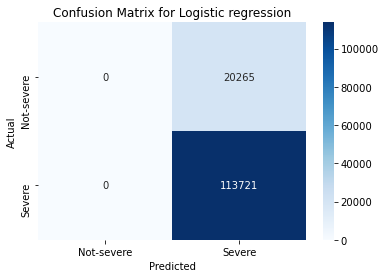

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

#Heatmap visualization
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not-severe", "Severe"], yticklabels=["Not-severe","Severe"])
plt.title("Confusion Matrix for Logistic regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 4-Model improvement
### We do this by handling Class Imbalances

In [159]:
# Initialize Logistic Regression with class weights
log_reg_model_weighted = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Train the model
log_reg_model_weighted.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_weighted = log_reg_model_weighted.predict(X_test_scaled)
print("Classification Report for Weighted Logistic Regression:")
print(classification_report(y_test, y_pred_weighted))


Classification Report for Weighted Logistic Regression:
              precision    recall  f1-score   support

$500 OR LESS       0.17      0.65      0.28     20265
 OVER $1,500       0.88      0.45      0.59    113721

    accuracy                           0.48    133986
   macro avg       0.53      0.55      0.44    133986
weighted avg       0.77      0.48      0.55    133986




## Findings for Weighted Logistic Regression Model
### The performance of the weighted Logistic Regression model has shown improvement compared to the initial model, but there are still significant issues with classification performance due to the class imbalance.
### For instance, on Accuracy socre, the model achieves an accuracy of 48%, which is lower than the initial model’s 85%. This is mainly because of the class imbalance, where the majority class ("OVER $1,500") dominates the predictions.
## Recommendation & improvement
### Consider ensemble methods like Random Forest, Gradient Boosting, or XGBoost. These models can handle class imbalance better and may provide better performance, especially in terms of recall for the minority class.

# 4.1.Modeling -RandomForest
## Step 1-Build a model to compare with Logistic regression model

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train a RandomForest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

$500 OR LESS       0.18      0.61      0.27     20265
 OVER $1,500       0.88      0.49      0.63    113721

    accuracy                           0.51    133986
   macro avg       0.53      0.55      0.45    133986
weighted avg       0.77      0.51      0.57    133986

[[12367  7898]
 [57981 55740]]


## Step 2-Evaluating the model
### We look at the various metric to evalaute the model

In [166]:
from sklearn.metrics import accuracy_score

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.51


## Step 3-Visualize the confusion Matrix
### We visualize to understand how well the model is performing in distinguishing between classes

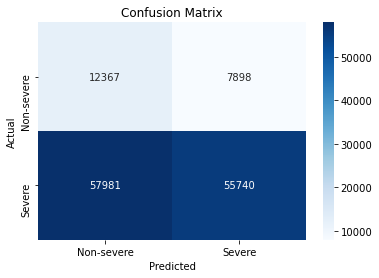

In [167]:
import seaborn as sns

# Plot confusion matrix for better visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-severe', 'Severe'], yticklabels=['Non-severe', 'Severe'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



## Findings for Weighted Logistic Regression Model
### The performance of the RandomForest model has shown improvement compared to the logistic fegression model, but there are still significant issues with classification performance due to the class imbalance.
### If we were to choose between the two models, then RandomForest model would be more ideal.
### Consider ensemble methods like Gradient Boosting, or XGBoost. These models can handle class imbalance better and may provide better performance, especially in terms of recall for the minority class.